## Load Data

In [37]:
import pandas as pd

nama_file = 'kemiskinan_2022.xlsx'
dataframe = pd.read_excel(nama_file)
dataframe

,City/District,Poverty Line by District/City (rupiah/capita/month),Percentage of Poor Population by District/City (Percent),Poverty Depth Index (P1) by District/City,Poverty Severity Index (P2) by District/City,Expenditures per Capita Adjusted (Thousand Rupiah),Average Length of Study (Years),Life Expectancy (Years)
0,Asahan,397944,8.64,1.22,0.27,11515,8.82,68.73
1,Batu Bara,508524,11.53,1.34,0.27,10755,8.26,67.55
2,Binjai,499451,5.10,0.49,0.08,11358,11.18,72.79
3,Dairi,436713,7.88,0.65,0.08,10740,9.72,69.64
4,Deli Serdang,448489,3.62,0.62,0.20,12657,10.27,72.07
5,Gunungsitoli,426349,14.81,2.24,0.55,8434,8.64,71.71
6,Humbang Hasundutan,419180,8.86,1.40,0.33,8250,10.00,70.02
7,Karo,563660,8.17,1.13,0.27,12554,10.02,72.03
8,Labuanbatu Utara,527922,9.09,1.17,0.26,12258,8.64,69.91
9,Labuhan Batu,489503,8.26,0.69,0.11,11474,9.40,70.37


## Normalisasi Data

In [38]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
scaler = MinMaxScaler()

# Mengambil kolom-kolom numerik mulai dari indeks ke-2
numerical_data = dataframe.iloc[:, 1:]

# Melakukan normalisasi pada data numerik
data_normalized = scaler.fit_transform(numerical_data)

# Membuat DataFrame baru dari data yang telah dinormalisasi
normalized_dataframe = pd.DataFrame(data_normalized, columns=numerical_data.columns)

# Menampilkan DataFrame baru yang telah dinormalisasi
normalized_dataframe


,Poverty Line by District/City (rupiah/capita/month),Percentage of Poor Population by District/City (Percent),Poverty Depth Index (P1) by District/City,Poverty Severity Index (P2) by District/City,Expenditures per Capita Adjusted (Thousand Rupiah),Average Length of Study (Years),Life Expectancy (Years)
0,0.168750,0.237577,0.180247,0.154472,0.573522,0.523132,0.507143
1,0.561666,0.374349,0.209877,0.154472,0.492247,0.423488,0.401786
2,0.529428,0.070043,0.000000,0.000000,0.556732,0.943060,0.869643
3,0.306505,0.201609,0.039506,0.000000,0.490643,0.683274,0.588393
4,0.348348,0.000000,0.032099,0.097561,0.695648,0.781139,0.805357
5,0.269680,0.529579,0.432099,0.382114,0.244038,0.491103,0.773214
6,0.244206,0.247989,0.224691,0.203252,0.224361,0.733096,0.622321
7,0.757577,0.215334,0.158025,0.154472,0.684633,0.736655,0.801786
8,0.630592,0.258874,0.167901,0.146341,0.652978,0.491103,0.612500
9,0.494080,0.219593,0.049383,0.024390,0.569137,0.626335,0.653571


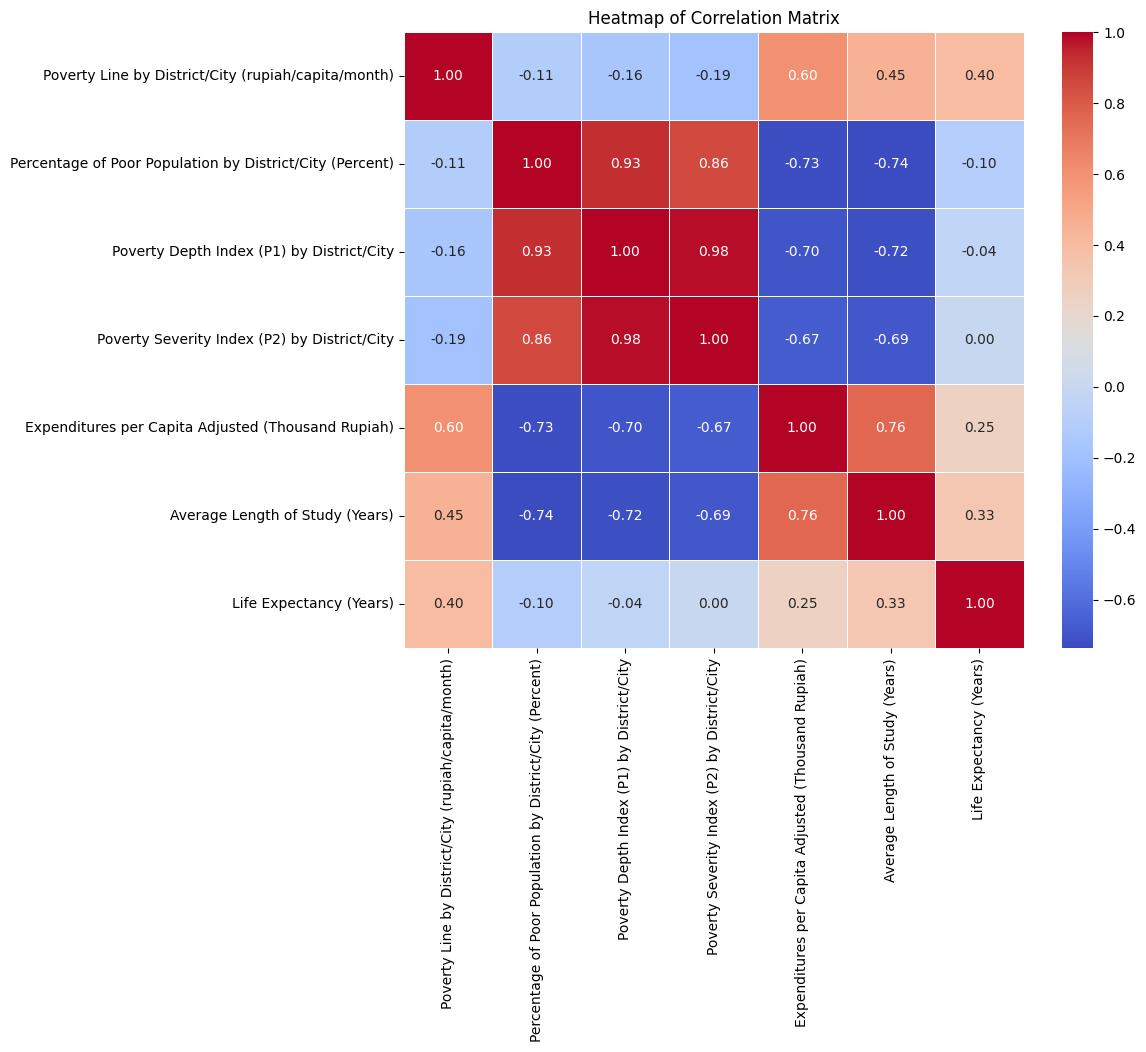

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriks korelasi
kor = normalized_dataframe.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(kor, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()


# **Regresi Konvensional : Default Parameter**

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Baca data yang telah dinormalisasi
data_normalized = normalized_dataframe  # Menggunakan DataFrame yang telah Anda normalisasi sebelumnya

# Pisahkan variabel independen dan dependen
X = data_normalized[['Poverty Line by District/City (rupiah/capita/month)',
                     'Percentage of Poor Population by District/City (Percent)',
                     'Poverty Depth Index (P1) by District/City',
                     'Expenditures per Capita Adjusted (Thousand Rupiah)',
                     'Average Length of Study (Years)',
                     'Life Expectancy (Years)']]

y = dataframe['Poverty Severity Index (P2) by District/City']  # Variabel dependen dari data awal

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model SVR
svr_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Latih model pada data latih
svr_regressor.fit(X_train, y_train)

# Lakukan prediksi pada data uji
predictions = svr_regressor.predict(X_test)

# Evaluasi performa model menggunakan MSE (Mean Squared Error)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error: {:.6f}".format(mse))

rmse = np.sqrt(mse)
print("Root Mean Squared Error: {:.6f}".format(rmse))


Mean Squared Error: 0.046881
Root Mean Squared Error: 0.216521


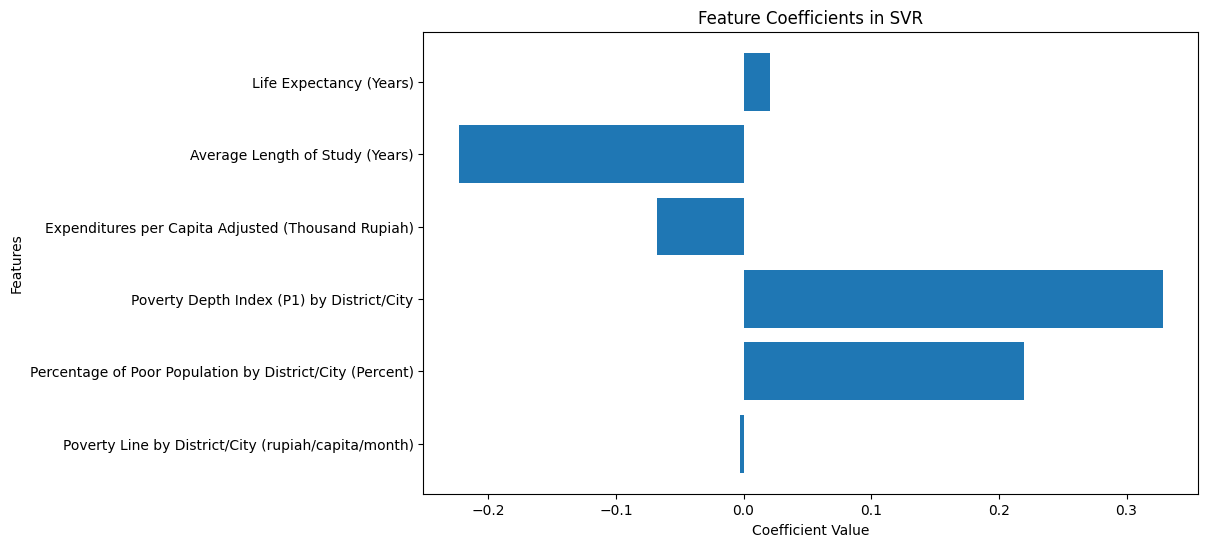

In [41]:
import matplotlib.pyplot as plt

# Dapatkan nilai koefisien untuk setiap fitur
coefficients = svr_regressor.coef_.ravel()

# Nama-nama fitur
feature_names = X.columns

# Visualisasi koefisien dalam bentuk bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Coefficients in SVR')
plt.show()


In [42]:
# Dapatkan nilai koefisien untuk setiap fitur
coefficients = svr_regressor.coef_.ravel()

# Nama-nama fitur
feature_names = X.columns

# Tampilkan nilai koefisien
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")


Poverty Line by District/City (rupiah/capita/month): -0.002554478938664881
Percentage of Poor Population by District/City (Percent): 0.21959035293828283
Poverty Depth Index (P1) by District/City: 0.32861081689283106
Expenditures per Capita Adjusted (Thousand Rupiah): -0.06793106321988071
Average Length of Study (Years): -0.2232763307270441
Life Expectancy (Years): 0.020504140709084878


In [43]:
all_parameters = svr_regressor.get_params()
for parameter, value in all_parameters.items():
    print(f"{parameter}: {value}")

C: 1.0
cache_size: 200
coef0: 0.0
degree: 3
epsilon: 0.1
gamma: scale
kernel: linear
max_iter: -1
shrinking: True
tol: 0.001
verbose: False


In [44]:
# Buat DataFrame yang berisi nilai aktual dan nilai prediksi
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Gabungkan DataFrame hasil dengan DataFrame variabel independen
results_df = pd.concat([X_test, results_df], axis=1)  # Menambahkan variabel independen di sebelah kiri

# Cetak tabel hasil
results_df

,Poverty Line by District/City (rupiah/capita/month),Percentage of Poor Population by District/City (Percent),Poverty Depth Index (P1) by District/City,Expenditures per Capita Adjusted (Thousand Rupiah),Average Length of Study (Years),Life Expectancy (Years),Actual,Predicted
31,0.810350,0.282537,0.160494,0.747728,0.848754,0.735714,0.25,0.193986
15,0.486853,1.000000,0.644444,0.000000,0.193950,0.569643,0.70,0.704983
26,0.324382,0.219593,0.296296,0.574484,0.667260,0.779464,0.52,0.279221
17,0.440888,0.936110,1.000000,0.045236,0.160142,0.611607,1.31,0.813246
8,0.630592,0.258874,0.167901,0.652978,0.491103,0.612500,0.26,0.275448
9,0.494080,0.219593,0.049383,0.569137,0.626335,0.653571,0.11,0.204569
19,0.286007,0.251775,0.059259,0.459309,0.637011,0.400000,0.11,0.215290


# **Regresi Gridsearch CV : Custom Parameter**

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Baca data yang telah dinormalisasi
data_normalisasi = normalized_dataframe  # Menggunakan DataFrame yang telah Anda normalisasi sebelumnya

# Pisahkan variabel independen dan dependen
X_var = data_normalisasi[['Poverty Line by District/City (rupiah/capita/month)',
                           'Percentage of Poor Population by District/City (Percent)',
                           'Poverty Depth Index (P1) by District/City',
                           'Expenditures per Capita Adjusted (Thousand Rupiah)',
                           'Average Length of Study (Years)',
                           'Life Expectancy (Years)']]

y_var = data_normalisasi['Poverty Severity Index (P2) by District/City']  # Variabel dependen dari data yang telah dinormalisasi

# Inisialisasi model Support Vector Regressor (SVR)
model = SVR()

# Definisikan grid parameter yang akan diuji
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5)

# Lakukan grid search pada data
grid_search.fit(X_var, y_var)

# Mendapatkan model terbaik setelah grid search
best_svr_model = grid_search.best_estimator_

# Lakukan prediksi pada data uji dengan model terbaik
predictions_svr = best_svr_model.predict(X_var)

# Evaluasi performa model menggunakan MSE (Mean Squared Error)
nilai_mse_svr = mean_squared_error(y_var, predictions_svr)
print("Mean Squared Error (SVR): {:.6f}".format(nilai_mse_svr))

nilai_rmse_svr = np.sqrt(nilai_mse_svr)
print("Root Mean Squared Error (SVR): {:.6f}".format(nilai_rmse_svr))


Mean Squared Error (SVR): 0.000605
Root Mean Squared Error (SVR): 0.024601


In [46]:
cv_results = -grid_search.cv_results_['mean_test_score']
cv_rmse = np.sqrt(cv_results)

for fold, mse, rmse in zip(range(5), cv_results, cv_rmse):
    print(f"Fold {fold+1} - MSE: {mse:.6f}, RMSE: {rmse:.6f}")

Fold 1 - MSE: 0.016899, RMSE: 0.129995
Fold 2 - MSE: 0.002874, RMSE: 0.053614
Fold 3 - MSE: 0.027723, RMSE: 0.166501
Fold 4 - MSE: 0.038828, RMSE: 0.197048
Fold 5 - MSE: 0.023731, RMSE: 0.154049


In [47]:
all_parameterss = best_svr_model.get_params()
for parameter, value in all_parameterss.items():
    print(f"{parameter}: {value}")

C: 10
cache_size: 200
coef0: 0.0
degree: 3
epsilon: 0.01
gamma: scale
kernel: linear
max_iter: -1
shrinking: True
tol: 0.001
verbose: False


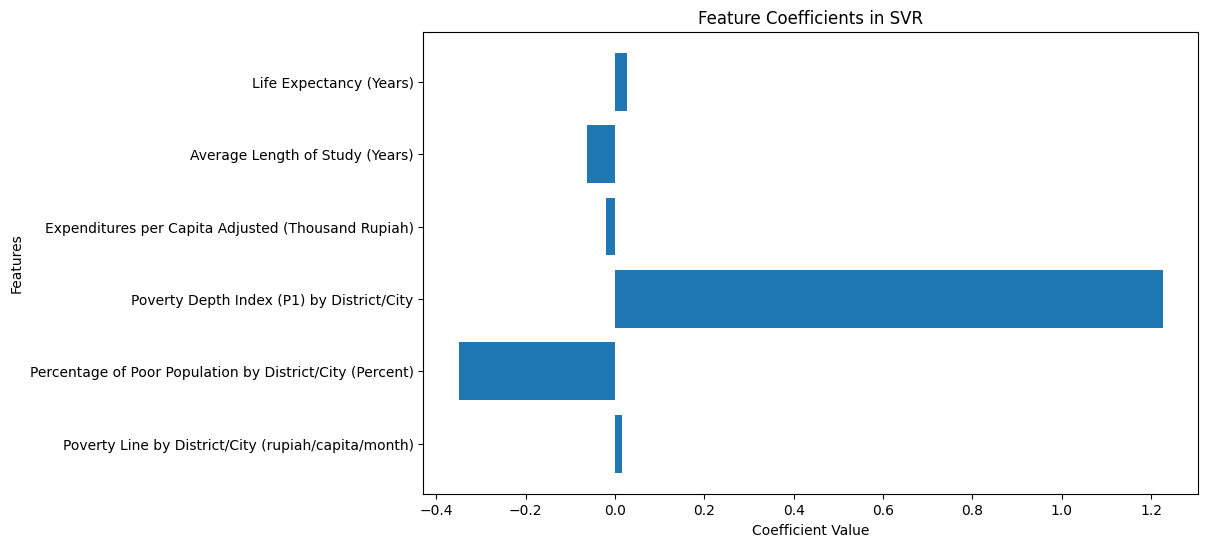

In [48]:
import matplotlib.pyplot as plt

# Dapatkan nilai koefisien untuk setiap fitur
coefficients = best_svr_model.coef_.ravel()

# Nama-nama fitur
feature_names = X.columns

# Visualisasi koefisien dalam bentuk bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Coefficients in SVR')
plt.show()


In [49]:
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}


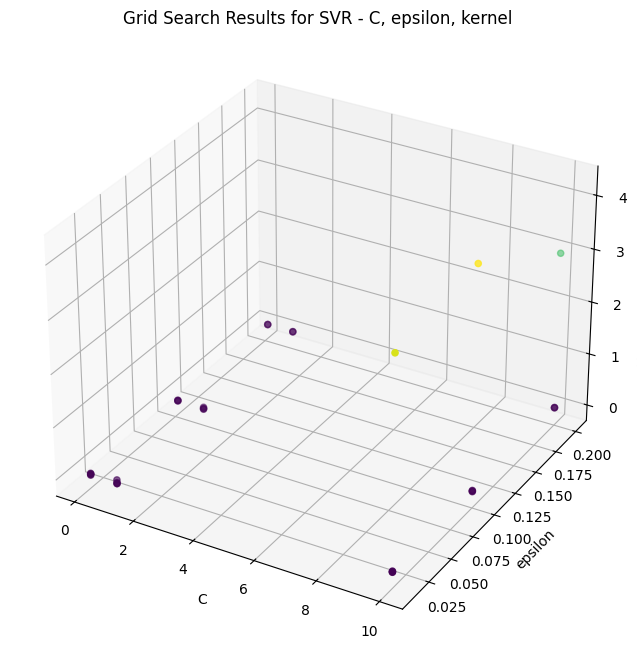

In [50]:
# Ambil data yang relevan dari hasil grid search
param1_values = grid_search.cv_results_['param_C'].data
param2_values = grid_search.cv_results_['param_epsilon'].data
param3_values = grid_search.cv_results_['param_kernel'].data
mean_test_scores = -grid_search.cv_results_['mean_test_score']

# Plot 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(param1_values, param2_values, mean_test_scores, c=mean_test_scores, cmap='viridis', marker='o')
ax.set_xlabel(param1)
ax.set_ylabel(param2)
ax.set_zlabel('Mean Test Score (MSE)')
plt.title(f'Grid Search Results for SVR - {param1}, {param2}, {param3}')
plt.show()


In [51]:
# Menampilkan tabel hasil GridSearchCV dalam bentuk teks
print("Grid Search Results for SVR Parameters:")
print("-" * 80)
print(f"| {'Parameter C':<15} | {'Parameter Epsilon':<15} | {'Parameter Kernel':<15} | {'Mean Test Score (MSE)':<20} |")
print("-" * 80)

for param_C, param_epsilon, param_kernel, mean_test_score in zip(param1_values, param2_values, param3_values, mean_test_scores):
    print(f"| {param_C:<15} | {param_epsilon:<15} | {param_kernel:<15} | {mean_test_score:<20} |")

print("-" * 80)

Grid Search Results for SVR Parameters:
--------------------------------------------------------------------------------
| Parameter C     | Parameter Epsilon | Parameter Kernel | Mean Test Score (MSE) |
--------------------------------------------------------------------------------
| 0.1             | 0.01            | linear          | 0.016898729826003957 |
| 0.1             | 0.01            | poly            | 0.0028744190430186997 |
| 0.1             | 0.01            | rbf             | 0.027722620465626367 |
| 0.1             | 0.01            | sigmoid         | 0.0388279786949834   |
| 0.1             | 0.1             | linear          | 0.023730978165383394 |
| 0.1             | 0.1             | poly            | 0.019698756305092137 |
| 0.1             | 0.1             | rbf             | 0.030310013015515048 |
| 0.1             | 0.1             | sigmoid         | 0.036253446200382365 |
| 0.1             | 0.2             | linear          | 0.0364185982756438   |
| 0

Kabupaten: Asahan
   Actual Value: 0.15447154471544716
   Predicted Value: 0.16405019356360734
-----------------------
Kabupaten: Batu Bara
   Actual Value: 0.15447154471544716
   Predicted Value: 0.16408079259235636
-----------------------
Kabupaten: Binjai
   Actual Value: 0.0
   Predicted Value: -0.00954659974766698
-----------------------
Kabupaten: Dairi
   Actual Value: 0.0
   Predicted Value: -0.0002225783643830595
-----------------------
Kabupaten: Deli Serdang
   Actual Value: 0.0975609756097561
   Predicted Value: 0.057265088263891366
-----------------------
Kabupaten: Gunungsitoli
   Actual Value: 0.38211382113821146
   Predicted Value: 0.38812735350920663
-----------------------
Kabupaten: Humbang Hasundutan
   Actual Value: 0.20325203252032523
   Predicted Value: 0.2128771434496936
-----------------------
Kabupaten: Karo
   Actual Value: 0.15447154471544716
   Predicted Value: 0.1459336018439909
-----------------------
Kabupaten: Labuanbatu Utara
   Actual Value: 0.1463414

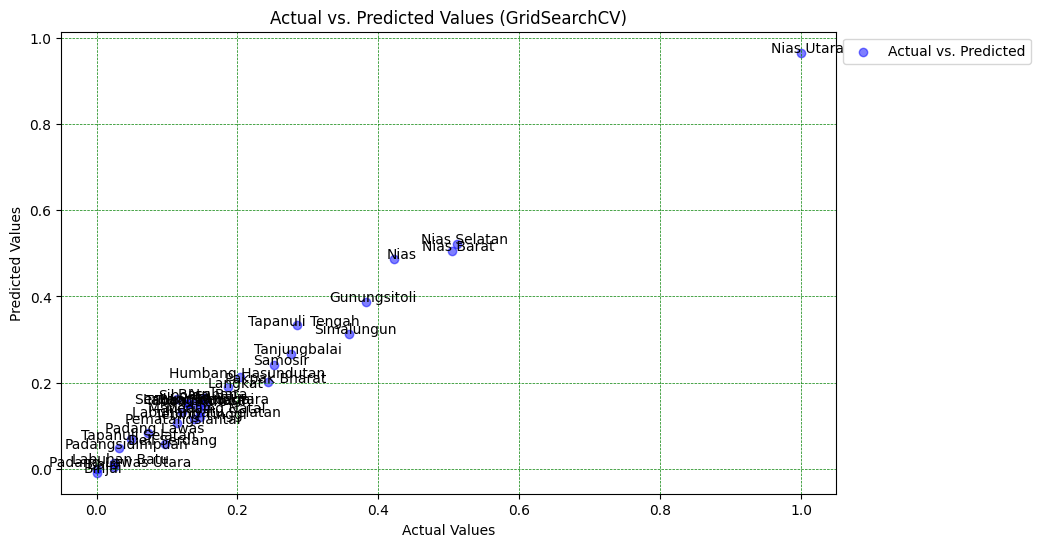

In [52]:
import matplotlib.pyplot as plt

kabupaten_namess = [
    'Asahan', 'Batu Bara', 'Binjai', 'Dairi', 'Deli Serdang', 'Gunungsitoli',
    'Humbang Hasundutan', 'Karo', 'Labuanbatu Utara', 'Labuhan Batu',
    'Labuhanbatu Selatan', 'Langkat', 'Mandailing Natal', 'Medan', 'Nias',
    'Nias Barat', 'Nias Selatan', 'Nias Utara', 'Padang Lawas',
    'Padang Lawas Utara', 'Padangsidimpuan', 'Pakpak Bharat', 'Pematangsiantar',
    'Samosir', 'Serdang Bedagai', 'Sibolga', 'Simalungun', 'Tanjungbalai',
    'Tapanuli Selatan', 'Tapanuli Tengah', 'Tapanuli Utara', 'Tebing Tinggi',
    'Toba Samosir'
]

plt.figure(figsize=(10, 6))

# Plot nilai aktual
plt.scatter(y_var, predictions_svr, color='blue', alpha=0.5, label='Actual vs. Predicted')

# Tambahkan label nama kabupaten pada setiap titik
for i, (actuals, predicteds) in enumerate(zip(y_var, predictions_svr)):
    kabupaten_names = kabupaten_namess[i]  # Ambil nama kabupaten sesuai indeks
    plt.annotate(kabupaten_names, (actuals, predicteds), fontsize=10, color='black', ha='center',
                 xytext=(5, 0), textcoords='offset points',)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (GridSearchCV)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(color='green', linestyle='--', linewidth=0.5)

# Tampilkan informasi dalam bentuk teks
for i, (actuals, predicteds) in enumerate(zip(y_var, predictions_svr)):
    kabupaten_names = kabupaten_namess[i]
    print(f"Kabupaten: {kabupaten_names}")
    print(f"   Actual Value: {actuals}")
    print(f"   Predicted Value: {predicteds}")
    print("-----------------------")

plt.show()


In [ ]:
average_mean_test_score = resultss_df['mean_test_score'].mean()
print("Rata-rata Mean Test Score:", average_mean_test_score)


Rata-rata Mean Test Score: 0.019340686892773334
